# Aula 1

## Vídeo 1.2 - Carregando textos

In [1]:
import pandas as pd

In [2]:
#url ='https://github.com/allanspadini/curso-tensorflow-proxima-palavra/raw/main/dados/train.zip'
url = "./dados/train.csv"

In [3]:
df = pd.read_csv(url, header=None, names=['ClassIndex','Título','Descrição'])
df.head()

,ClassIndex,Título,Descrição
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


https://github.com/allanspadini/curso-tensorflow-proxima-palavra/blob/main/dados/classes.txt

In [4]:
df['Texto'] = df['Título'] + ' ' + df['Descrição']

In [5]:
df['Texto']

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: Texto, Length: 120000, dtype: object

In [6]:
df['ClassIndex'] = df['ClassIndex'] - 1

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_treino, X_teste, y_treino,y_teste = train_test_split(df['Texto'].values, df['ClassIndex'].values, test_size=0.2, random_state=4266)

## Vídeo 1.3 - Codificando o texto

In [9]:
import tensorflow as tf

2024-12-02 18:22:51.570044: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 18:22:51.591699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 18:22:51.591718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 18:22:51.592199: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 18:22:51.595937: I tensorflow/core/platform/cpu_feature_guar

In [10]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)


2024-12-02 18:22:52.646701: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 18:22:52.677940: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 18:22:52.683855: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [11]:
encoder.adapt(X_treino)

In [12]:
encoder.get_vocabulary()[::10]

['',
 '39s',
 'it',
 'was',
 'more',
 'company',
 'than',
 'microsoft',
 'prices',
 'people',
 'next',
 'sales',
 'state',
 'most',
 'profit',
 'lead',
 'online',
 '39t',
 'red',
 'during',
 'say',
 'between',
 'country',
 'mobile',
 'quarter',
 'being',
 'dollar',
 'stock',
 'sox',
 'olympic',
 'users',
 'price',
 'how',
 'peace',
 'six',
 'key',
 'i',
 'should',
 'financial',
 'leaders',
 'house',
 'sun',
 'used',
 'seven',
 'israel',
 'future',
 'trial',
 'half',
 'customers',
 'defense',
 'arafat',
 'northern',
 'due',
 'men',
 'hopes',
 'using',
 'scored',
 'university',
 'texas',
 'mark',
 'we',
 'accused',
 'profits',
 '18',
 'possible',
 'call',
 'rally',
 'teams',
 'division',
 '7',
 'takeover',
 'production',
 'outlook',
 'began',
 'helped',
 'opening',
 'sept',
 'spain',
 'hours',
 'starting',
 'nine',
 'pressure',
 'executives',
 'personal',
 'once',
 'italian',
 'push',
 'continued',
 'rising',
 'kill',
 'powerful',
 'side',
 'designed',
 'groups',
 'mission',
 'najaf',
 '

In [13]:
Exemplo = "Today's NFL games PITTSBURGH at NY GIANTS"

In [14]:
encoder(Exemplo)

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([  1, 713, 202,   1,  14,   1, 516])>

## Vídeo 1.4 - Criando um modelo

In [15]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')

])

In [16]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

https://projector.tensorflow.org/

In [17]:
X_teste[0]

'Border Patrol Training Moves Near Mexico (AP) AP - Incoming Border Patrol agents will train closer to the U.S.-Mexican border when the federal government relocates their academy to Artesia, N.M., Customs and Border Protection announced Thursday.'

In [18]:
y_teste[0]

0

In [19]:
X_teste.shape

(24000,)

In [20]:
modelo.predict(X_teste[:1])

1/1 [==============================] - 0s 148ms/step


array([[0.25069076, 0.2499981 , 0.24842507, 0.2508861 ]], dtype=float32)

In [21]:
modelo.predict(X_teste[:1]).argmax(axis=1)

1/1 [==============================] - 0s 15ms/step


array([3])

# Aula 2 - Classificando o texto

## Vídeo 2.1: Treinando com camadas densas

In [22]:
epocas = 10

In [23]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

Epoch 1/10


2024-12-02 18:22:55.837096: I external/local_xla/xla/service/service.cc:168] XLA service 0x71df52ea22b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-02 18:22:55.837116: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-12-02 18:22:55.840867: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-02 18:22:55.856592: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1733174575.896635   28233 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3000/3000 [==============================] - 11s 4ms/step - loss: 1.2456 - accuracy: 0.6015 - val_loss: 0.9958 - val_accuracy: 0.7384
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.7988 - accuracy: 0.7765 - val_loss: 0.6600 - val_accuracy: 0.7915
Epoch 3/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.5856 - accuracy: 0.8068 - val_loss: 0.5390 - val_accuracy: 0.8123
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5063 - accuracy: 0.8241 - val_loss: 0.4904 - val_accuracy: 0.8275
Epoch 5/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4713 - accuracy: 0.8341 - val_loss: 0.4681 - val_accuracy: 0.8359
Epoch 6/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4521 - accuracy: 0.8414 - val_loss: 0.4533 - val_accuracy: 0.8411
Epoch 7/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4398 - accuracy: 0.8463 - val_loss: 0.4454 - val_accuracy: 0.8468
Ep

In [24]:
import matplotlib.pyplot as plt

In [25]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

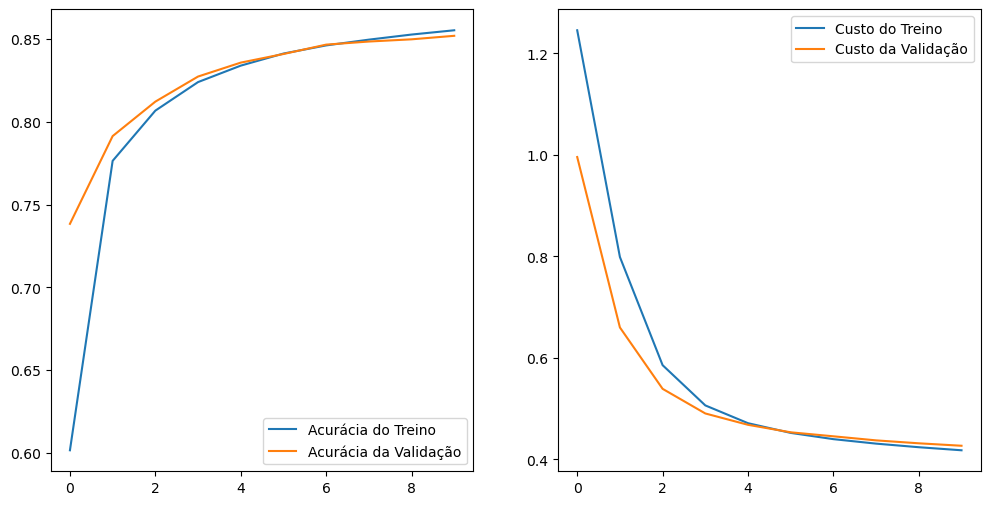

In [26]:
plota_resultados(history,epocas)

## Vídeo 2.2: Adicionando camadas convolucionais

In [ ]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True
    ),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(128, kernel_size=4, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [ ]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

In [ ]:
plota_resultados(history,epocas)

## Vídeo 2.3 - Adicionando camadas LSTM

In [ ]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # Camada BiLSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [ ]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epocas = 20

In [ ]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

In [ ]:
plota_resultados(history,epocas)

In [ ]:
modelo.predict(X_teste[1:2])

In [ ]:
modelo.predict(X_teste[1:2]).argmax(axis=1)

In [ ]:
y_teste[1]

# Aula 3 - Validando os resultados

## Vídeo 3.1 - Buscando os melhores parâmetros

In [28]:
!conda install keras-tuner -y

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - rapidsai
 - nvidia
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/marcelo/miniconda3/envs/tc5

  added / updated specs:
    - keras-tuner


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.11.26 |       h06a4308_0         131 KB
    dm-tree-0.1.7              |  py310h6a678d5_1         157 KB
    keras-core-0.1.7           |     pyhd8ed1ab_0         518 KB  conda-forge
    keras-tuner-1.4.7          |     pyhd8ed1ab_0          79 KB  conda-forge
    kt-legacy-1.0.5            |  py310h06a4308_0          14 KB
    namex-0.0.7                |  py310h06a4308_0          13 KB
    ------------------------------------------------------------
                                           Total:         914 KB

The following NEW packages will be INSTAL

In [29]:
import keras_tuner as kt

In [30]:
# Função para criar o modelo
def build_model(hp):
    model = tf.keras.Sequential([
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
            mask_zero=True
        ),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
            return_sequences=True
        )),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units', min_value=16, max_value=64, step=16)
        )),
        tf.keras.layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [31]:
# Configuração do tuner para otimização de hiperparâmetros
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    directory='my_dir',
    project_name='classification_optimization'
)

## Vídeo 3.2 - Aplicando a validação cruzada

In [32]:
from sklearn.model_selection import KFold

In [33]:
# Função para fazer a validação cruzada e otimização de hiperparâmetros
def run_tuner(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        tuner.search(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold))

    # Resumo dos melhores hiperparâmetros encontrados
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"""
          A pesquisa de hiperparâmetros foi concluída. O número ideal de dimensões de incorporação é {best_hps.get('embedding_dim')},
          o número ideal de unidades LSTM é {best_hps.get('lstm_units')}, e
          o número ideal de unidades densas é {best_hps.get('dense_units')},
          e a taxa de abandono ideal é {best_hps.get('dropout')}.
    """)

    return best_hps

In [34]:
best_hps = run_tuner(X_treino, y_treino)

Trial 10 Complete [00h 02m 36s]
val_accuracy: 0.86697918176651

Best val_accuracy So Far: 0.8695312738418579
Total elapsed time: 00h 16m 30s

          A pesquisa de hiperparâmetros foi concluída. O número ideal de dimensões de incorporação é 128,
          o número ideal de unidades LSTM é 128, e
          o número ideal de unidades densas é 128,
          e a taxa de abandono ideal é 0.4.
    


## Vídeo 3.3 - Testando a rede

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
# Criar o modelo final usando os melhores hiperparâmetros
final_model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=best_hps.get('embedding_dim'),
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=best_hps.get('lstm_units'),
        return_sequences=True
    )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=best_hps.get('lstm_units') // 2
    )),
    tf.keras.layers.Dense(
        units=best_hps.get('dense_units'),
        activation='relu'
    ),
    tf.keras.layers.Dropout(rate=best_hps.get('dropout')),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [37]:
# Compilar o modelo final
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Treinar o modelo final com todos os dados de treinamento
final_model.fit(X_treino, y_treino, epochs=10, validation_data=(X_teste, y_teste))

Epoch 1/10
3000/3000 [==============================] - 47s 14ms/step - loss: 0.4658 - accuracy: 0.8330 - val_loss: 0.4063 - val_accuracy: 0.8584
Epoch 2/10
3000/3000 [==============================] - 35s 12ms/step - loss: 0.3885 - accuracy: 0.8650 - val_loss: 0.3911 - val_accuracy: 0.8565
Epoch 3/10
3000/3000 [==============================] - 35s 12ms/step - loss: 0.3591 - accuracy: 0.8729 - val_loss: 0.3573 - val_accuracy: 0.8709
Epoch 4/10
3000/3000 [==============================] - 35s 12ms/step - loss: 0.3318 - accuracy: 0.8812 - val_loss: 0.3644 - val_accuracy: 0.8685
Epoch 5/10
3000/3000 [==============================] - 35s 12ms/step - loss: 0.3069 - accuracy: 0.8891 - val_loss: 0.3567 - val_accuracy: 0.8740
Epoch 6/10
3000/3000 [==============================] - 35s 12ms/step - loss: 0.2832 - accuracy: 0.8967 - val_loss: 0.3629 - val_accuracy: 0.8742
Epoch 7/10
3000/3000 [==============================] - 35s 12ms/step - loss: 0.2571 - accuracy: 0.9062 - val_loss: 0.3730 -

In [39]:
# Fazer previsões no conjunto de teste
y_pred = final_model.predict(X_teste)
y_pred_classes = y_pred.argmax(axis=1)

750/750 [==============================] - 5s 4ms/step


In [40]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_teste, y_pred_classes)

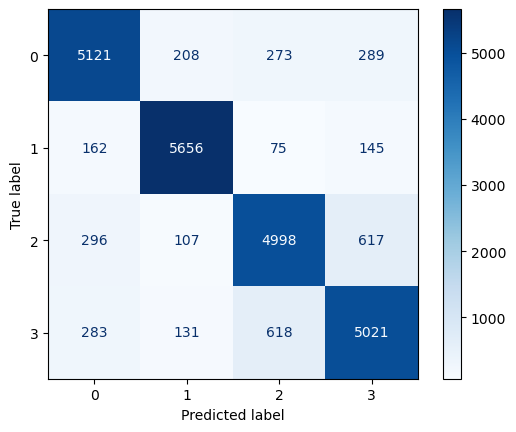

In [41]:
# Mostrar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.show()